In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
#Ajustando a visualização de colunas
#pd.set_option('display.max_columns', None)

#Importando os dados
train=pd.read_csv('../train.csv')
test=pd.read_csv('../test.csv')

#Olhando as 5 primeiras linhas do conjunto de treinamento
train.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38,TARGET
0,1,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000,0
1,3,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000,0
2,4,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000,0
3,8,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000,0
4,10,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016,0


In [51]:
#Olhando as 5 primeiras linhas do conjunto de teste
test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


### Analisando os dados

Para auxiliar no trabalho de escrita e entendimento do código, vamos adicionar o pacote ipdb de debug, que nos auxilia com métodos de debug como breakpoints

In [47]:
!pip install -Uqq ipdb
import ipdb

vamos usar o comando "%pdb on" para que sempre que o código resultar em uma Exception, o código irá parar e o visualizador do debug irá abrir automaticamente.

In [48]:
%pdb on

Automatic pdb calling has been turned ON


In [52]:
# Para facilitar o trabalho e enxergar tudo de maneira organizada e resumida, vamos definir uma função:

def info(data):
    print('DATASET SHAPE: ', data.shape, '\n')
    print('-'*50)
    print('TIPOS DE DADOS POR FEATURE:')
    print(data.info())
    print('\n', '-'*50)
    print('NÚMERO DE VALORES ÚNICOS POR FEATURE \n')
    print(data.nunique())
    print('\n', '-'*50)
    print('VALORES NULOS POR FEATURE')
    existe = data.isnull().sum().any()
    print('Existe algum valor nulo?: ' + str(existe))
    print(data.isnull().sum())
    print('\n', '-'*50)
    print('ESTATÍSTICAS BÁSICAS')
    print(data.describe())

In [ ]:
info(train)

Observamos que não existem valores nulos no dataset. A variável "ID", aparentemente, é o único valor único de diferenciação dentre os outros.
A função .info() indica "dtypes: float64(111), int64(260)", portanto não existem variáveis categóricas.

In [ ]:
info(test)

Observamos que, assim como na base de treinamento, não existem valores nulos em nenhuma coluna do dataset. Enquanto na base de treino existem 76020 amostras, na base de teste existem 75818, o que é uma divisão quase de 50% para treino e teste. Idealmente esta divisão deveria ter uma maior proporção para o treino.
A função .info() indica "dtypes: float64(110), int64(260)", portanto não existem variáveis categóricas.

Para ter certeza das informações achadas via inspeção, vamos fazer testes unitários. Para tal, decidimos usar o pacote "unittest" por ter a classe "TestNotebook" e permitir fazer testes dentro de um Jupyter Notebook

In [55]:
import unittest

In [56]:
#Definindo os testes que queremos


#Cirando a classe
class TestNotebook(unittest.TestCase):
    
    #Checando se há valores faltantes
    def test_missing_values(self):
        assert train['TARGET'].isna().sum()<1
        
    #Checando se há valores duplicados
    def test_duplicate_values(self):
        assert len(train['ID'].unique())==train.shape[0]
        
    

In [57]:
unittest.main(argv=[''], verbosity=2, exit=False)

test_duplicate_values (__main__.TestNotebook) ... ok
test_missing_values (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 2 tests in 0.007s

OK


Observamos que os dados passaram nos 2 testes

In [3]:
print(train['TARGET'].value_counts())

0    73012
1     3008
Name: TARGET, dtype: int64


Text(0, 0.5, 'Quantidade')

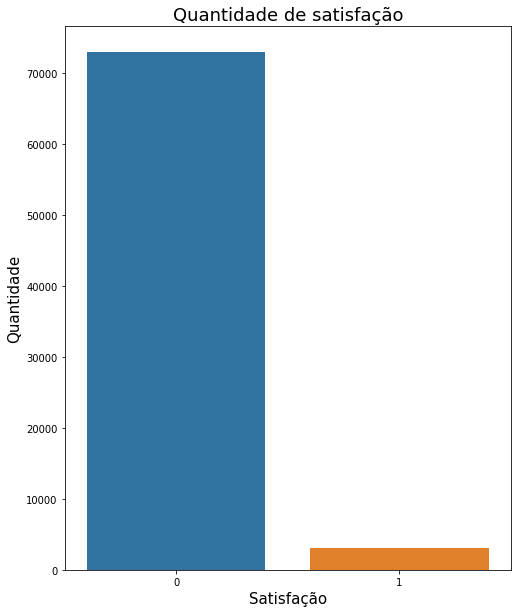

In [4]:
#Configurações de visualização
fig = plt.figure(figsize=(8,10))

#Gerando o gráfico
ax = sns.countplot(data=train, 
                 x='TARGET',  
                 order=train['TARGET'].value_counts().index,
                )
ax.set_title('Quantidade de satisfação', fontsize=18)
ax.set_xlabel('Satisfação', fontsize=15)
ax.set_ylabel('Quantidade', fontsize=15) 


Note que temos muito mais exemplos de não satisfação (TARGET=0) do que de satisfação (Target=1). Idealmente, é interessante considerar técnicas de balanceamento de base de dados.

In [5]:
X_train=train.copy()
X_train.drop(labels=['ID','TARGET'], axis=1, inplace = True)
print(train.shape)
print(X_train.shape)
X_train.head()

(76020, 371)
(76020, 369)


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2,34,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2,37,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [7]:
# using sklearn variancethreshold to find features with low variance

#Vai reirar os dados que mais se repetem (As colunas que tem, praticamente, só um valor)

from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold(threshold=0.01) #Limiar de aceitação de variação de 1%
sel.fit(X_train)  # fit finds the features with low variance

#Precisamos voltar os dados para o formato Dataframe
X2_train=X_train.columns[sel.get_support()].copy() #Pega os labels


#Vamos adicioanr um breakpoint aqui para saber se a variável X2_train foi de fato criada da maneira que queríamos
#ipdb.set_trace()

# we can then drop these columns from the train and test sets
X_train = sel.transform(X_train)

Comandando o ipdb para visualizar a variável X2_train, conseguimos notar que ela contém os nomes de todas as colunas. Portanto, retornou a informação que precisávamos.

In [8]:
#Aqui retornamos os nomes das colunas e o formato de Dataframe
X_train=pd.DataFrame(X_train,columns=X2_train)
X_train.head()

,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39205.170000
1,2.0,34.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,49278.030000
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,67333.770000
3,2.0,37.0,0.0,195.0,195.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,64007.970000
4,2.0,39.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117310.979016


In [9]:
#Normalização dos dados
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
scaled = scaler.fit_transform(X_train)
X_train_norm = pd.DataFrame(scaled, columns=X_train.columns) #Criamos o novo Dataframe normalizado

In [10]:
Y_train=train["TARGET"]

In [11]:
#Balanceamento dos dados

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

smote = SMOTE(sampling_strategy=0.2, random_state=42)
X_train_sm,Y_train_sm = smote.fit_resample(X_train_norm,Y_train)

under = RandomUnderSampler(random_state=42)
X,Y = under.fit_resample(X_train_sm,Y_train_sm)

print('X inicial: ',X_train.shape)
print('X após oversample: ',X_train_sm.shape)
print('X após undersample: ',X.shape)

print('Y inicial: ',Y_train.shape)
print('Y após oversample: ',Y_train_sm.shape)
print('Y após undersample: ',Y.shape)

X.head()

X inicial:  (76020, 272)
X após oversample:  (87614, 272)
X após undersample:  (29204, 272)
Y inicial:  (76020,)
Y após oversample:  (87614,)
Y após undersample:  (29204,)


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,0.999764,0.18,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005091
1,0.999764,0.18,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.006019
2,0.999764,0.19,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.014230
3,0.999764,0.31,0.000286,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.005529
4,0.999764,0.18,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.004962


In [12]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import KFold

#kf = KFold(n_splits=5)
net = MLPClassifier(solver='adam', activation='logistic', alpha=1e-5, hidden_layer_sizes=(20,20), random_state=1) #Somente 1 neurônio de saída
net.out_activation_='identity'
net.fit(X,Y)
net.score(X,Y)


c:\Users\kaioh\anaconda3\envs\nn\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:702: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


0.7597589371318998

Vamos importar funções para computar e comparar as métricas que a rede alcança na base de treino, já que não temos os TARGET na base de teste.

In [13]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

#Prevendo os resultados com a rede treinada para os dados da base de treino
resultado_base_treino = net.predict(X)

In [14]:
#Fazendo a avaliação das métricas da rede

cf_matrix = confusion_matrix(Y,resultado_base_treino)
print(cf_matrix)
print(classification_report(Y,resultado_base_treino))

[[10706  3896]
 [ 3120 11482]]
              precision    recall  f1-score   support

           0       0.77      0.73      0.75     14602
           1       0.75      0.79      0.77     14602

    accuracy                           0.76     29204
   macro avg       0.76      0.76      0.76     29204
weighted avg       0.76      0.76      0.76     29204



<AxesSubplot:>

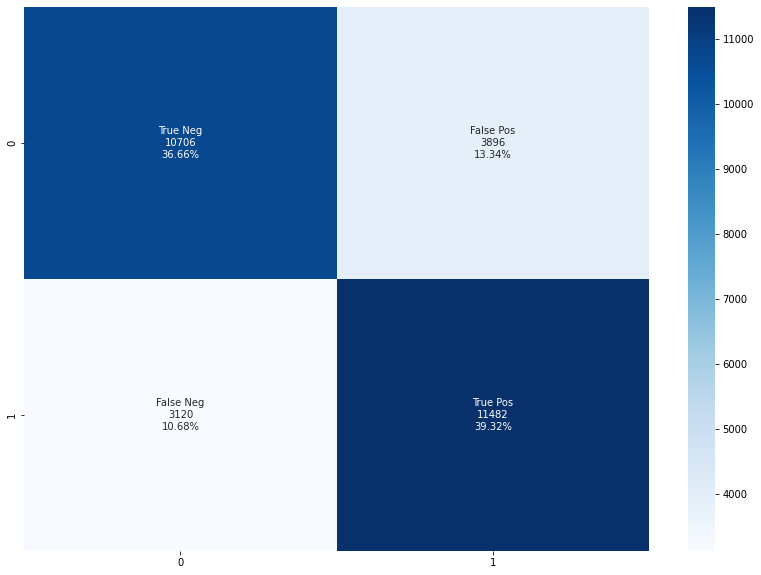

In [15]:
import seaborn as sns

fig = plt.figure(figsize=(14,10))
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

In [17]:
test=pd.read_csv('../test.csv')
test.head()

,ID,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2,2,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,5,2,35,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,6,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,7,2,24,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,9,2,23,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [18]:
X_test = test.copy()
X_test.drop(labels=['ID'], axis=1, inplace = True)
X2_test=X_test.columns[sel.get_support()].copy()

# we can then drop these columns from the train and test sets
X_test = sel.transform(X_test)
X_test=pd.DataFrame(X_test,columns=X2_test) # Retorna com os labels e o formato de Dataframe
X_test.head()


,var3,var15,imp_ent_var16_ult1,imp_op_var39_comer_ult1,imp_op_var39_comer_ult3,imp_op_var40_comer_ult1,imp_op_var40_comer_ult3,imp_op_var40_efect_ult1,imp_op_var40_efect_ult3,imp_op_var40_ult1,...,saldo_medio_var29_ult3,saldo_medio_var33_hace2,saldo_medio_var33_hace3,saldo_medio_var33_ult1,saldo_medio_var33_ult3,saldo_medio_var44_hace2,saldo_medio_var44_hace3,saldo_medio_var44_ult1,saldo_medio_var44_ult3,var38
0,2.0,32.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,40532.10
1,2.0,35.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45486.72
2,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,46993.95
3,2.0,24.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,187898.61
4,2.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,73649.73


In [19]:
scaler = MinMaxScaler()
scaler.fit(X_test)
scaled = scaler.fit_transform(X_test)
X_test_norm = pd.DataFrame(scaled, columns=X_test.columns)
Y_pred = net.predict(X_test_norm) #Fazendo a predição da rede

Y_pred = pd.DataFrame(Y_pred,columns=["TARGET"])
Y_pred.insert(0,"ID",test["ID"])

In [20]:
# Dando uma olhada no arquivo final solicitado pelo Kaggle
Y_pred.head()

,ID,TARGET
0,2,1
1,5,1
2,6,0
3,7,0
4,9,0


In [ ]:
Y_pred.to_csv('submission.csv',index=False)